In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:


# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y

# Introduce missing values (10% NaNs)
np.random.seed(42)
mask = np.random.rand(*X.shape) < 0.1  # 10% missing values
df_missing = df.copy()
df_missing.loc[mask] = np.nan

# Display first 5 rows with missing values
print(df_missing.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                NaN               NaN                NaN               NaN   
2                NaN               NaN                NaN               NaN   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     NaN  
2     NaN  
3     0.0  
4     0.0  


In [3]:
df_missing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,NaN,NaN,NaN,NaN,NaN
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  88 non-null     float64
 1   sepal width (cm)   88 non-null     float64
 2   petal length (cm)  88 non-null     float64
 3   petal width (cm)   88 non-null     float64
 4   target             88 non-null     float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
from sklearn.impute import KNNImputer

# Initialize KNN Imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_missing), 
    columns=df_missing.columns
)

# Display first 5 rows after imputation
print(df_imputed.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           5.100000          3.500000           1.400000          0.200000   
1           5.829545          3.063636           3.717045          1.176136   
2           5.829545          3.063636           3.717045          1.176136   
3           4.600000          3.100000           1.500000          0.200000   
4           5.000000          3.600000           1.400000          0.200000   

   target  
0     0.0  
1     1.0  
2     1.0  
3     0.0  
4     0.0  


In [7]:
df_imputed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100000,3.500000,1.400000,0.200000,0.0
1,5.829545,3.063636,3.717045,1.176136,1.0
2,5.829545,3.063636,3.717045,1.176136,1.0
3,4.600000,3.100000,1.500000,0.200000,0.0
4,5.000000,3.600000,1.400000,0.200000,0.0
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300000,2.0
146,5.829545,3.063636,3.717045,1.176136,1.0
147,6.500000,3.000000,5.200000,2.000000,2.0
148,6.200000,3.400000,5.400000,2.300000,2.0


In [8]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Split data for evaluation
def evaluate_model(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}:\n{classification_report(y_test, y_pred)}")

# Evaluate before imputation
X_missing = df_missing.drop("target", axis=1)
y_missing = df_missing["target"].dropna()
evaluate_model(X_missing, y_missing, "Before Imputation")  # Fails due to NaNs



ValueError: Found input variables with inconsistent numbers of samples: [150, 88]

In [5]:
# Evaluate after imputation
X_imputed = df_imputed.drop("target", axis=1)
y_imputed = df_imputed["target"].astype(int)
evaluate_model(X_imputed, y_imputed, "After KNN Imputation")

After KNN Imputation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.96      0.98        27
           2       0.88      1.00      0.93         7

    accuracy                           0.98        45
   macro avg       0.96      0.99      0.97        45
weighted avg       0.98      0.98      0.98        45



# Imbalanced data

In [ ]:
>> if one class dominates over other class then model will not able to find pattern in the data
>> total=10
90 to class fraud
10 to class not fraud

two options:
    oversampling- add samples to minor class
    undersampling- delete rows from major class
    
for oversampling:
1.randomoversampler

SMOTE.

In [7]:
pip install -U imbalanced-learn

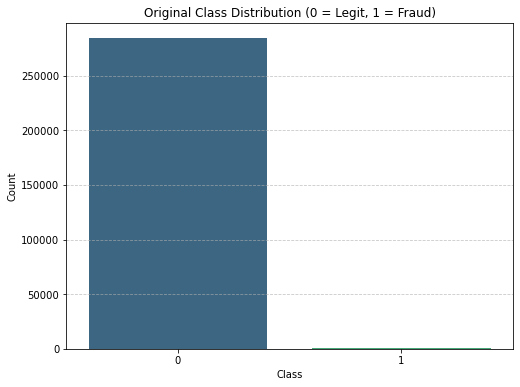

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load dataset (replace with your local path)
df = pd.read_csv("creditcard.csv")

# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=df, palette="viridis")
plt.title("Original Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Anaconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


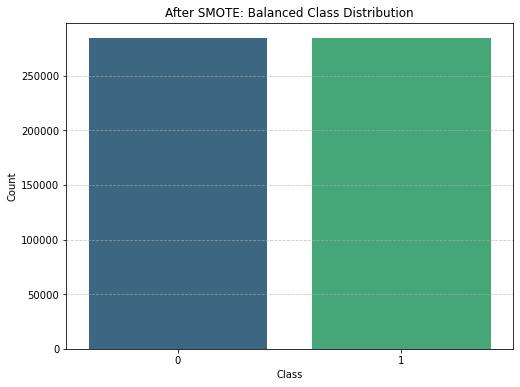

In [9]:
#Apply SMOTE to Balance Classes
# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Convert to DataFrame for visualization
df_res = pd.DataFrame(X_res, columns=X.columns)
df_res["Class"] = y_res

# Plot balanced class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=df_res, palette="viridis")
plt.title("After SMOTE: Balanced Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56